In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn import datasets



Using TensorFlow backend.


In [3]:
def to_one_hot(y, k):
    """
    @brief      Convert numeric class values to one hot vectors
    @param      y     An array of labels of length N
    @param      k     Number of classes
    @return     A 2d array of shape (N x K), where K is the number of classes
    """
    # IMPLEMENT ME
    N = len(y)
    one_hot = np.zeros([N, k])

    for i in range(n_pts):
        one_hot[i][y[i]] = 1 
    return one_hot

In [18]:
# Dataset definition

n_pts = 600
random_state = 123
centers = [[-1,1],[-1,-1],[1,-1]]
X, Y = datasets.make_blobs(n_pts,random_state,centers=centers,cluster_std=0.4)

# One-hot encoding of the data labels

k = max(Y)+1
Y_one = to_one_hot(Y, k)
print(Y_one)   



[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


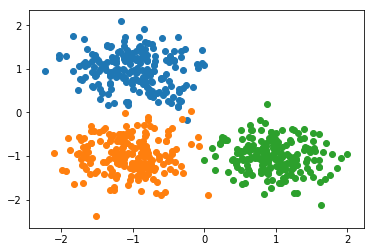

In [5]:
# Printing the dataset for visualization
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])

In [24]:
# Initializing the Deep Neural Network

model = Sequential()

model.add(Dense(units=3, input_shape =(2,), activation = 'softmax'))
# model.add(Dense(3, activation='sigmoid'))
adam=Adam(lr=0.01)

model.compile(adam, 
             loss='categorical_crossentropy',
             metrics=['accuracy'])
h=model.fit(x=X, 
            y=Y_one,
           verbose=0,
           batch_size=20,
           epochs=100, shuffle='true'
           )

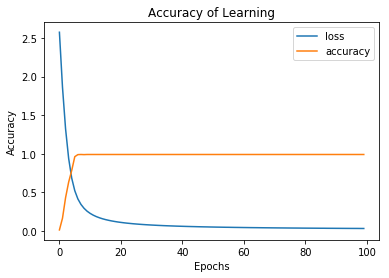

In [21]:
# Plotting the results

plt.plot(h.history['loss'])
plt.title('Accuracy of Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(h.history['acc'])
plt.legend(['loss','accuracy'])

[[0.66193753 0.32418308 0.01387937]]


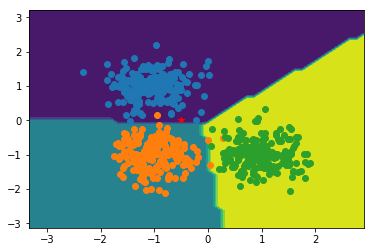

In [30]:
def plot_boundary(data, label, model):
    x_span = np.linspace(min(data[:,0])-1, max(data[:,0])+1)
    y_span = np.linspace(min(data[:,1])-1, max(data[:,1])+1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_] 
    pred_fun = model.predict_classes(grid)
    z = pred_fun.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    
plot_boundary(X, Y_one, model)

# Printing the dataset for visualization
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])

x = -0.5
y = 0.0
point = np.array([[x,y]])
predict = model.predict(point)
plt.plot([x],[y], marker ="*",color ='red')
print(predict)
